In [88]:
### 1A ###
print("--------- 1a) ---------")
import pandas as pd, csv
file = 'tasks.csv'
with open(file) as f:
    reader = csv.reader(f) #, delimiter to add delimiter
    header = next(reader) # Getting rid of the header line
    task = [row for row in reader]
task_list = pd.DataFrame(pd.DataFrame(task).values,columns=header)
team_memberships = pd.DataFrame(task_list[['assignee','team']])
team_memberships.columns=['user_id','team_id']
print(team_memberships)
print("--------- end ---------")

--------- 1a) ---------
     user_id team_id
0        114       8
1         31      10
2         22      14
3         58       8
4          5      14
...      ...     ...
9995     100       3
9996      29      11
9997      27       5
9998     112      12
9999      93       4

[10000 rows x 2 columns]
--------- end ---------


In [89]:
### 1B ###
print("--------- 1b) ---------")
numMemberPerTeam = team_memberships.groupby('team_id')
numMemberPerTeam = numMemberPerTeam.count().reset_index()
print(numMemberPerTeam)
print("--------- end ---------")

--------- 1b) ---------
   team_id  user_id
0        0      599
1        1      660
2       10      625
3       11      667
4       12      638
5       13      654
6       14      624
7       15      624
8        2      667
9        3      572
10       4      636
11       5      588
12       6      610
13       7      628
14       8      631
15       9      577
--------- end ---------


--------- 1c) ---------
The insight that we are getting is that some team are overwhelm with member such as Team 2 and 10 while some team has lesser member such as team 3 and 9
--------- end ---------


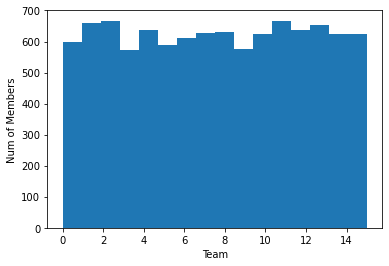

In [90]:
### 1C ###
print("--------- 1c) ---------")
%matplotlib inline
import matplotlib.pyplot as plt
team_memberships = team_memberships.astype(int).sort_values("team_id", axis = 0, ascending = True)
teamMember = plt.figure()
histogram = teamMember.add_subplot(1,1,1)
histogram.hist(team_memberships['team_id'],16)
histogram.set_xlabel('Team')
histogram.set_ylabel('Num of Members')
print("The insight that we are getting is that some team are overwhelm with member such as Team 2 and 10 while some team has lesser member such as team 3 and 9")
print("--------- end ---------")

In [91]:
### 1D ###
print("--------- 1d) ---------")
file = 'state-transitions.csv'
with open(file) as f:
    reader = csv.reader(f) #, delimiter to add delimiter
    header = next(reader) # Getting rid of the header line
    task = [row for row in reader]
state_transitions = pd.DataFrame(pd.DataFrame(task).values,columns=header)
task_list_state = state_transitions.groupby(["task_id"]).last().reset_index()[["task_id","state"]]
task_list_state = task_list.merge(task_list_state, left_on="id", right_on="task_id")
task_list_state.columns = ['id','description','assignee','sprint','team','story_points','task_id','current_state']
task_list_state.drop(task_list_state.columns[[6]], axis=1, inplace=True)
print(task_list_state)
print("--------- end ---------")

--------- 1d) ---------
        id                                        description assignee sprint  \
0        0  Itself most affect rise after product tend eat...      114      1   
1        1  Begin herself make Congress see eight possible...       31      6   
2        2  Plan big themselves left public glass result o...       22      1   
3        3  Finally table by establish begin maybe tough s...       58      1   
4        4  Seem that although executive of energy chair p...        5      1   
...    ...                                                ...      ...    ...   
9995  9995  Bad sometimes over thank nation notice perform...      100      6   
9996  9996  Quickly through almost beat mention wife owner...       29      8   
9997  9997  Affect nice car identify those change seem all...       27      5   
9998  9998  Police skin painting discuss whose floor threa...      112      7   
9999  9999  Likely prove charge thousand seat little would...       93      9   

   

In [92]:
### 1E ###
print("--------- 1e) ---------")
task_list_state['story_points'] = task_list_state['story_points'].astype(int)
task_list_teamID_sprint = task_list_state.groupby(["team", "sprint"]).sum().reset_index()[["team", "sprint","story_points"]]

def compute_commitment(team_id, sprint):
    result = task_list_teamID_sprint.loc[(task_list_teamID_sprint['team'].astype(int) == team_id) & (task_list_teamID_sprint['sprint'].astype(int) == sprint)]['story_points'].item()
    return result

print(compute_commitment(8,1))
print("--------- end ---------")

--------- 1e) ---------
350
--------- end ---------


In [93]:
### 1F ###
print("--------- 1f) ---------")
task_list_state['story_points'] = task_list_state['story_points'].astype(int)
task_list_teamID_sprint_done = task_list_state.groupby(["team", "sprint","current_state"]).sum().reset_index()[["team", "sprint","current_state","story_points"]]

def compute_velocity(team_id, sprint):
    result = task_list_teamID_sprint_done.loc[(task_list_teamID_sprint_done['team'].astype(int) == team_id) \
        & (task_list_teamID_sprint_done['sprint'].astype(int) == sprint) \
        & (task_list_teamID_sprint_done['current_state'] == 'done')]['story_points'].item()
    return result

print(compute_velocity(8,1))
print("--------- end ---------")

--------- 1f) ---------
61
--------- end ---------


--------- 1g) ---------
Used percentage bar chart to show the overall progress for each sprint and from the graph, we can see     sprint 3 is having some issue completing their task hence either motivate them or move some member from sprint 5 to sprint 2        to help them temporary.
--------- end --------- 


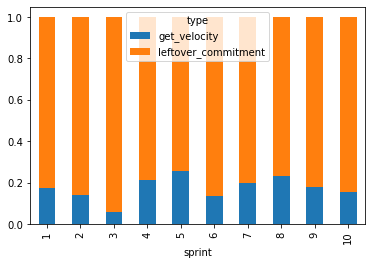

In [94]:
### 1G ###
print("--------- 1g) ---------")
task_list_state['team'] = task_list_state['team'].astype(int)

def visualize_velocity_commitment(team_id):    
    #uniqueSprint = task_list_state.loc[task_list_state['team'] == team_id, ['sprint']].sprint.unique()
    count = 1
    graphData = []
    while count <= 10:
        velocity = compute_velocity(team_id,count)
        commitment = compute_commitment(team_id,count)
        data = {'sprint': count, 'type': 'get_velocity'}
        data['value'] = velocity/commitment
        graphData.append(data)
        data = {'sprint': count, 'type': 'leftover_commitment'}
        data['value'] = (commitment-velocity)/commitment
        graphData.append(data)
        count += 1
    df = pd.DataFrame(graphData)
    df.groupby(['sprint','type']).sum().unstack().plot(kind='bar',y='value', stacked=True)
    
visualize_velocity_commitment(8)
print("Used percentage bar chart to show the overall progress for each sprint and from the graph, we can see \
    sprint 3 is having some issue completing their task hence either motivate them or move some member from sprint 5 to sprint 2\
        to help them temporary.")
print("--------- end --------- ")

In [95]:
### 2a ###
print("--------- 2a) ---------")
import sqlite3
conn = sqlite3.connect('mobile.sqlite')
cur = conn.cursor()
cur.execute('DROP TABLE IF EXISTS task_list_state_table')
cur.execute('''
    CREATE TABLE task_list_state_table(
        id INTEGER, description TEXT, assignee INTEGER, 
        sprint INTEGER, team INTEGER, story_points INTEGER, current_state TEXT)
''')
conn.close()

from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Enum, Float, ForeignKey
from sqlalchemy import and_
Base = declarative_base()
class Task_list_state(Base):
    __tablename__ = 'task_list_state_table'    
    id = Column(Integer, primary_key=True)
    description = Column(String)
    assignee = Column(Integer)
    sprint = Column(Integer)
    team = Column(Integer)
    story_points = Column(Integer)
    current_state = Column(String)
    def __repr__(self):
        return "%s %s %s %s %s %s %s" %(str(self.id), self.description, str(self.assignee), str(self.sprint), str(self.team), str(self.story_points), self.current_state)    
# Create session to insert data using ORM
from sqlalchemy import create_engine
engine = create_engine('sqlite:///mobile.sqlite', echo=False)
Base = declarative_base(engine)
from sqlalchemy.orm import sessionmaker
Session = sessionmaker(bind=engine)
session = Session()
for index, row in task_list_state.iterrows():
    task_list_state_item = Task_list_state(
        id = int(row[0]),
        description = row[1],
        assignee = int(row[2]),
        sprint = int(row[3]),
        team = int(row[4]),
        story_points = int(row[5]),
        current_state = row[6]
    )    
    print(task_list_state_item)    
    session.add(task_list_state_item)
    session.commit()
print("--------- end ---------")

--------- 2a) ---------
0 Itself most affect rise after product tend eat also individual behavior author professor toward base hot alone seven school president significant. 114 1 8 13 tech_spec
1 Begin herself make Congress see eight possible describe institution such central only American note address leave sort guy case nor way protect couple one job blood. 31 6 10 5 functional_spec
2 Plan big themselves left public glass result own about now some buy. 22 1 14 13 implementation
3 Finally table by establish begin maybe tough similar tend yes against whatever. 58 1 8 2 implementation
4 Seem that although executive of energy chair probably our attack animal manage front she attention less. 5 1 14 3 draft
5 Admit research north key always look politics own describe store reflect camera too culture day success step recently add allow view clearly feel budget. 42 1 11 5 implementation
6 Administration from box product heart experience none energy speak open political car area car condition

--------- 2b) ---------
With the single diagram showing 5 graph for different current status against their sprint, we can able to see     which team is slow such as sprint 3 had yet to complete any story points.
--------- end ---------


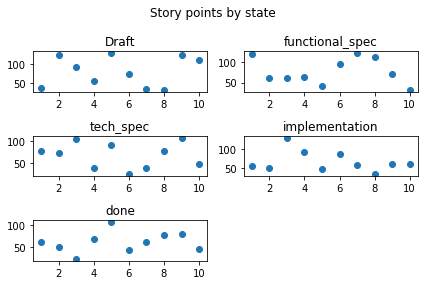

In [249]:
### 2b ###
print("--------- 2b) ---------")
def visualize_story_points_by_state(team_id):
    result_draft = session.query(Task_list_state.sprint, Task_list_state.current_state,\
        func.sum(Task_list_state.story_points))\
        .filter(and_(Task_list_state.team == team_id, Task_list_state.current_state == 'draft'))\
        .group_by(Task_list_state.sprint)\
        .group_by(Task_list_state.current_state)
    result_draft_data = []
    for r in result_draft:
        result_draft_data.append(r[2])

    result_fs = session.query(Task_list_state.sprint, Task_list_state.current_state,\
        func.sum(Task_list_state.story_points))\
        .filter(and_(Task_list_state.team == team_id, Task_list_state.current_state == 'functional_spec'))\
        .group_by(Task_list_state.sprint)\
        .group_by(Task_list_state.current_state)
    result_fs_data = []
    for r in result_fs:
        result_fs_data.append(r[2])

    result_ts = session.query(Task_list_state.sprint, Task_list_state.current_state,\
        func.sum(Task_list_state.story_points))\
        .filter(and_(Task_list_state.team == team_id, Task_list_state.current_state == 'tech_spec'))\
        .group_by(Task_list_state.sprint)\
        .group_by(Task_list_state.current_state)
    result_ts_data = []
    for r in result_ts:
        result_ts_data.append(r[2])

    result_implementation = session.query(Task_list_state.sprint, Task_list_state.current_state,\
        func.sum(Task_list_state.story_points))\
        .filter(and_(Task_list_state.team == team_id, Task_list_state.current_state == 'implementation'))\
        .group_by(Task_list_state.sprint)\
        .group_by(Task_list_state.current_state)
    result_implementation_data = []
    for r in result_implementation:
        result_implementation_data.append(r[2])

    result_done = session.query(Task_list_state.sprint, Task_list_state.current_state,\
        func.sum(Task_list_state.story_points))\
        .filter(and_(Task_list_state.team == team_id, Task_list_state.current_state == 'done'))\
        .group_by(Task_list_state.sprint)\
        .group_by(Task_list_state.current_state)
    result_done_data = []
    for r in result_done:
        result_done_data.append(r[2])

    sprint = [1,2,3,4,5,6,7,8,9,10]
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig = plt.figure()

    draft = fig.add_subplot(3,2,1)
    draft.plot(sprint,result_draft_data, 'o' )
    draft.set_title('Draft')
    fig.suptitle("Story points by state")
    fig.tight_layout()

    fs = fig.add_subplot(3,2,2)
    fs.plot(sprint,result_fs_data, 'o' )
    fs.set_title('functional_spec')
    fig.suptitle("Story points by state")
    fig.tight_layout()
    
    ts = fig.add_subplot(3,2,3)
    ts.plot(sprint,result_ts_data, 'o' )
    ts.set_title('tech_spec')
    fig.suptitle("Story points by state")
    fig.tight_layout()
    
    implementation = fig.add_subplot(3,2,4)
    implementation.plot(sprint,result_implementation_data, 'o' )
    implementation.set_title('implementation')
    fig.suptitle("Story points by state")
    fig.tight_layout()
    
    done = fig.add_subplot(3,2,5)
    done.plot(sprint,result_done_data, 'o' )
    done.set_title('done')
    fig.suptitle("Story points by state")
    fig.tight_layout()
    

visualize_story_points_by_state(8)
print("With the single diagram showing 5 graph for different current status against their sprint, we can able to see \
    which team is slow such as sprint 3 had yet to complete any story points.")
print("--------- end ---------")

In [250]:
### 2c i ###
print("--------- 2c i) ---------")
from sqlalchemy import func
def compute_commitment_2c_i(team_id, sprint):
    commitement = 0
    result = session.query(func.sum(Task_list_state.story_points))\
        .filter(and_( Task_list_state.team == team_id, Task_list_state.sprint == sprint))\
        .group_by(Task_list_state.team)\
        .group_by(Task_list_state.sprint)
    for r in result:
        commitement = r[0]
    print(f"The commitment by Team {team_id} for sprint {sprint} is: {commitement}")
compute_commitment_2c_i(8,1)
print("--------- end ---------")

--------- 2c i) ---------
The commitment by Team 8 for sprint 1 is: 350
--------- end ---------


In [251]:
### 2c ii ###
print("--------- 2c ii) ---------")
def compute_velocity_2c_ii(team_id, sprint):
    commitement = 0
    result = session.query(func.sum(Task_list_state.story_points))\
        .filter(and_( Task_list_state.team == team_id, Task_list_state.sprint == sprint,\
            Task_list_state.current_state == 'done'))\
        .group_by(Task_list_state.team)\
        .group_by(Task_list_state.sprint)
    for r in result:
        commitement = r[0]
    print(f"The commitment by Team {team_id} for sprint {sprint} is: {commitement}")
compute_velocity_2c_ii(8,1)

print("--------- end ---------")

--------- 2c ii) ---------
The commitment by Team 8 for sprint 1 is: 61
--------- end ---------


In [252]:
### 2d i ###
print("--------- 2d i) ---------")
def compute_commitment_2d_i(team_id, sprint):
    commitement = 0
    conn = sqlite3.connect('mobile.sqlite')
    cur = conn.cursor()
    cur.execute('select sum(story_points) from task_list_state_table where team = (?) and sprint = (?)',(team_id,sprint))
    for row in cur:
        commitement = row[0]
    cur.close()
    print(f"The commitment by Team {team_id} for sprint {sprint} is: {commitement}")
compute_commitment_2d_i(8,1)
print("--------- end ---------")

--------- 2d i) ---------
The commitment by Team 8 for sprint 1 is: 350
--------- end ---------


In [253]:
### 2d ii ###
print("--------- 2d ii) ---------")
def compute_commitment_2d_ii(team_id, sprint):
    commitement = 0
    conn = sqlite3.connect('mobile.sqlite')
    cur = conn.cursor()
    cur.execute('select sum(story_points) from task_list_state_table where team = (?) and sprint = (?) \
        and current_state == (?)',(team_id,sprint,'done'))
    for row in cur:
        commitement = row[0]
    cur.close()
    print(f"The commitment by Team {team_id} for sprint {sprint} is: {commitement}")
compute_commitment_2d_ii(8,1)
print("--------- end ---------")

--------- 2d ii) ---------
The commitment by Team 8 for sprint 1 is: 61
--------- end ---------


In [254]:
### 2e i ###
print("--------- 2e i) ---------")
from sqlalchemy import func
def who_done_the_least_2e_i(team_id):
    result_lowest = session.query(Task_list_state.assignee, \
        func.sum(Task_list_state.story_points))\
        .filter(and_( Task_list_state.team == team_id, Task_list_state.current_state == 'done'))\
        .group_by(Task_list_state.assignee)\
        .order_by(func.sum(Task_list_state.story_points))
    lowest_result = result_lowest[0][1]
    output = f"The member ID that done the least number of done story points for Team {team_id} is:"
    for r in result_lowest:
        if r[1] == lowest_result:
            output += " "+str(r[0])
    print(output)
who_done_the_least_2e_i(8)
print("--------- end ---------")

--------- 2e i) ---------
The member ID that done the least number of done story points for Team 8 is: 23 28 129 136
--------- end ---------


In [255]:
### 2e ii ###
print("--------- 2e ii) ---------")
from sqlalchemy import func
def who_done_the_least_2e_ii(team_id):
    conn = sqlite3.connect('mobile.sqlite')
    cur = conn.cursor()
    calculate_lowest = conn.cursor()
    calculate_lowest.execute('select sum(story_points) lowest_point from task_list_state_table where team = (?)\
            and current_state == (?) group by assignee order by sum(story_points) limit 1',(team_id,'done'))
    for row in calculate_lowest:
        lowest = row[0]
    cur.execute('select * from (select assignee, sum(story_points) sum_story_points from task_list_state_table\
        where team = (?)\
        and current_state == (?)\
        group by assignee order by sum(story_points)) where sum_story_points == (?)'
        ,(team_id,'done', lowest))
    output = f"The member ID that done the least number of done story points for Team {team_id} is:"
    for row in cur:
        output += " "+str(row[0])
    cur.close()
    print(output)
who_done_the_least_2e_ii(8)
print("--------- end ---------")

--------- 2e ii) ---------
The member ID that done the least number of done story points for Team 8 is: 23 28 129 136
--------- end ---------
